In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.coordinates import SkyCoord, ICRS
import astropy.units as u
%matplotlib inline

import popsims
from popsims.simulator import Population, pop_mags, compute_vols_and_numbers
from popsims.galaxy import Disk, Halo
from popsims.core_tools import sample_from_powerlaw
from popsims.plot_style import  plot_style
#plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

plot_style()

#plt.style.use('dark_background')

In [2]:
#roman deep field in the Fornax constellation
#https://hubblesite.org/contents/media/images/2021/003/01EX00FCXRZ7YVP4MPMAT1PW2X?news=true
#l=-27° 47' 29.04"
#03h 32m 38.99s
l= 2*np.pi*np.random.uniform(0, 1, 100)*u.radian
b= (np.arccos(2*np.random.uniform(0, 1, 100)-1)-np.pi/2)*u.radian

#coords=SkyCoord([SkyCoord(l="-27° 47' 29.04", b='03h 32m 38.99s', frame='galactic' ),
#          SkyCoord(l="-45° 47' 29.04", b='00h 32m 38.99s', frame='galactic' )]).transform_to(ICRS)

coords=SkyCoord(l=l, b=b, frame='galactic' ).transform_to(ICRS)

In [3]:
#compute magnitudes from distances
#assign roman magnitudes
roman_keys=['WFI_R062', 'WFI_Z087', 'WFI_Y106', 'WFI_J129', 'WFI_H158', 'WFI_F184', 'WFI_Prism', 'WFI_Grism']
jwst_keys=[ 'NIRISS_F115W']
euclid_keys=['EUCLID_Y', 'EUCLID_J', 'EUCLID_H']

all_keys=np.concatenate([roman_keys, jwst_keys, euclid_keys])

footprint = SkyCoord(l=np.random.uniform(-np.pi, np.pi, 10)*u.rad, 
                     b= np.random.uniform(-np.pi/2, np.pi/2, 10)*u.rad, frame='galactic' )

In [4]:
cols=['spt', 'distance', 'scale', 'scale_times_model', 'scale_unc', 'NIRISS_F115W',  'abs_NIRISS_F115W',\
'WFI_J129', 'WFI_H158', 'WFI_F184', 'WFI_Prism', 'WFI_Grism']

In [5]:
maglimits={'NIRISS_F115W': [10, 27.]}
sptgrid=np.arange(15, 40)

In [6]:
maglimits_roman_grism={'WFI_Prism': [10, 21.]}
maglimits_roman_j={'WFI_J129': [10, 26.9]}

In [7]:
#n1_halo_roman_grism=compute_vols_and_numbers(df1, Halo(), sptgrid, footprint,  maglimits_roman_grism)
#n1_halo_roman_j=compute_vols_and_numbers(df1, Halo(), sptgrid, footprint,  maglimits_roman_j)

In [8]:
p1_tdisk=Population(evolmodel= 'burrows1997',
              imf_power=-0.6,
              binary_fraction=0.2,
              age_range=[8, 14],
              mass_range=[0.01, .1],
             nsample=1e6)
    
p1_tdisk.simulate()

p1_disk=Population(evolmodel= 'burrows1997',
          imf_power=-0.6,
          binary_fraction=0.2,
          age_range=[0.01, 8],
          mass_range=[0.01, .1],
         nsample=1e6)
p1_disk.simulate()

In [9]:
p1_halo=Population(evolmodel= 'burrows1997',
          imf_power=-0.6,
          binary_fraction=0.2,
          age_range=[10, 14],
          mass_range=[0.01, .1],
         nsample=1e6)
p1_halo.simulate()

In [10]:
numbers_grism={200:None, 300: None, 600: None }
for k in numbers_grism.keys():
    p1_disk.add_distances(Disk(L=2600, H=float(k)), footprint.l.radian,footprint.b.radian, 0.1,  50_000, dsteps=5000)
    p1_disk.add_magnitudes(all_keys, get_from='spt',object_type='dwarfs')
    numbers_grism[k]=compute_vols_and_numbers(p1_disk.to_dataframe(cols), Disk(L=2600,  H=float(k)), sptgrid, footprint, maglimits_roman_grism)


In [11]:
numbers_j={200:None, 300: None, 600: None }
for k in numbers_j.keys():
    p1_disk.add_distances(Disk(L=2600, H=float(k)), footprint.l.radian,footprint.b.radian, 0.1,  50_000, dsteps=5000)
    p1_disk.add_magnitudes(all_keys, get_from='spt',object_type='dwarfs')
    df1=p1_disk.to_dataframe(cols)
    numbers_j[k]=compute_vols_and_numbers(df1, Disk(L=2600,  H=float(k)), sptgrid, footprint, maglimits_roman_j)

In [12]:
p1_tdisk.add_distances(Disk(L=2600, H=900), footprint.l.radian,footprint.b.radian, 0.1,  50_000, dsteps=5000)
p1_tdisk.add_magnitudes(all_keys, get_from='spt',object_type='dwarfs')
numbers_j.update({'tdisk': compute_vols_and_numbers(p1_tdisk.to_dataframe(cols), Disk(L=2600, H=900), sptgrid, footprint, \
                                                   maglimits_roman_j)})
                 
p1_halo.add_distances(Halo(), footprint.l.radian,footprint.b.radian, 0.1,  50_000, dsteps=5000)
p1_halo.add_magnitudes(all_keys, get_from='spt',object_type='dwarfs')
numbers_j.update({'halo': compute_vols_and_numbers(p1_halo.to_dataframe(cols), Halo(), sptgrid, footprint, \
                                                   maglimits_roman_j)})
 

In [13]:
p1_tdisk.add_distances(Disk(L=2600, H=900), footprint.l.radian,footprint.b.radian, 0.1,  50_000, dsteps=5000)
p1_tdisk.add_magnitudes(all_keys, get_from='spt',object_type='dwarfs')
numbers_grism.update({'tdisk': compute_vols_and_numbers(p1_tdisk.to_dataframe(cols), Disk(L=2600, H=900), sptgrid, footprint, \
                                                   maglimits_roman_grism)})
                 
p1_halo.add_distances(Halo(), footprint.l.radian,footprint.b.radian, 0.1,  50_000, dsteps=5000)
p1_halo.add_magnitudes(all_keys, get_from='spt',object_type='dwarfs')
numbers_grism.update({'halo': compute_vols_and_numbers(p1_halo.to_dataframe(cols), Halo(), sptgrid, footprint, \
                                                   maglimits_roman_grism)})
 

In [14]:
AREA0=0.1*(u.degree**2)
AREA= AREA0.to(u.radian**2)/(AREA0.to(u.degree**2))
colors={200: 'k',300: 'k',600: 'k' ,'tdisk':'#FF851B','halo': '#0074D9'}
linestyles={200: '--',300: '-',600: '-.','tdisk':':', 'halo': ':'}
scale_factors={200: 1,300: 1,600: 1 ,'tdisk':0.12,'halo': 1/400}
labels={200: 'H=200 pc',300: 'H=300 pc',600: 'H=600 pc' ,'tdisk':'Thick Disk','halo': 'Halo'}

In [15]:
def tick_function(locs, distlimits):
    return ["{:.1f} kpc".format(x/1000) for x in  distlimits]

[4634.51095491  894.53206971  446.78676606  409.74259733  299.62585375]
[60798.97416783 12165.49238105  6214.2284444   5621.42701937
  3869.31571717]


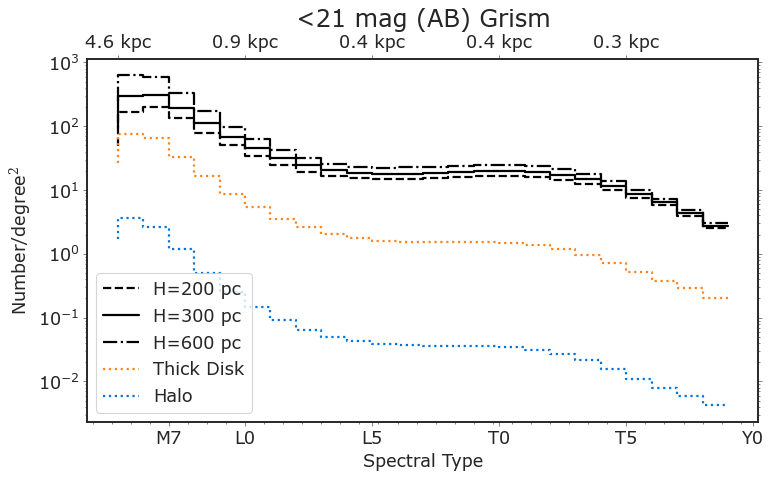

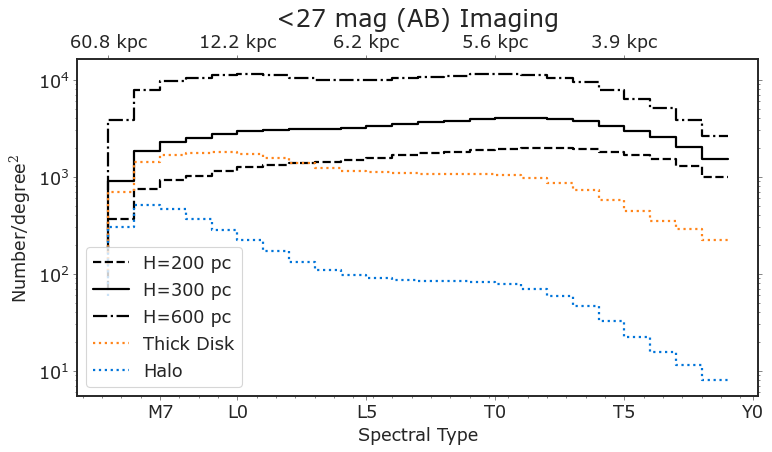

In [16]:
tot_df=[]

fig, ax=plt.subplots(figsize=(10, 6))
for k in numbers_grism.keys():
    sc= scale_factors[k]
    n0=sc*AREA*numbers_grism[k][0].loc[sptgrid].values.flatten()*numbers_grism[k][1].loc[sptgrid].values.flatten()
    df=pd.DataFrame()
    df['spt']=sptgrid
    df['survey']= 'Grism'
    df['Number/Sq. Deg']=np.round(n0.value, 3)
    df['Model']= labels[k]
    df['Distance']=np.round(pd.Series(numbers_grism[k][-1]).loc[sptgrid].values,0)
    tot_df.append(df)
 
    ax.step(sptgrid, n0, color= colors[k], linestyle=linestyles[k], label=labels[k], linewidth=2)
#for a in ax:
ax.set(yscale='log', ylabel=r'Number/degree$^2$', xlabel='Spectral Type', \
   xticks=[17, 20, 25, 30, 35, 40], xticklabels=['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])
ax.minorticks_on()
ax.legend(loc='lower left')
ax.set(title='<21 mag (AB) Grism')
plt.tight_layout()
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
new_tick_locations = np.array([15, 20, 25, 30, 35])
ax2.set_xticks(new_tick_locations)
dists=pd.Series(numbers_grism[k][-1]).loc[new_tick_locations].values
print (dists)
ax2.set_xticklabels(tick_function(new_tick_locations, dists))
          
plt.savefig('/users/caganze/roman_preds_grism.pdf')
                     
fig, ax=plt.subplots(figsize=(10, 6))
for k in numbers_grism.keys():    
    sc= scale_factors[k]
    n1=sc*AREA*numbers_j[k][0].loc[sptgrid].values.flatten()*numbers_j[k][1].loc[sptgrid].values.flatten()
    ax.step(sptgrid, n1, color= colors[k], linestyle=linestyles[k], label=labels[k], linewidth=2)
    
    df=pd.DataFrame()
    df['spt']=sptgrid
    df['survey']= 'Imaging'
    df['Number/Sq. Deg']=np.round(n1.value, 3)
    df['Model']= labels[k]
    df['Distance']=np.round(pd.Series(numbers_j[k][-1]).loc[sptgrid].values,0)
    tot_df.append(df)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
new_tick_locations = np.array([15, 20, 25, 30, 35])
ax2.set_xticks(new_tick_locations)
dists=pd.Series(numbers_j[k][-1]).loc[new_tick_locations].values
print (dists)
ax2.set_xticklabels(tick_function(new_tick_locations, dists))
    
ax.set(yscale='log', ylabel=r'Number/degree$^2$', xlabel='Spectral Type', \
   xticks=[17, 20, 25, 30, 35, 40], xticklabels=['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])
ax.minorticks_on()
ax.legend(loc='lower left')
ax.set(title='<27 mag (AB) Imaging')
plt.tight_layout()
                       
plt.savefig('/users/caganze/roman_preds_imaging.pdf')
    


In [17]:
pd.concat(tot_df).to_csv('roman_counts.csv', index=False)

In [18]:
sptrgid_2= np.arange(17, 40)
sptrgid_2

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [19]:
k=300
sc=1
n0=sc*AREA*numbers_grism[k][0].loc[sptrgid_2].values.flatten()*numbers_grism[k][1].loc[sptrgid_2].values.flatten()

In [20]:
n0.sum()*0.6

<Quantity 614.11339303 rad2 / deg2>

In [21]:
n1=sc*AREA*numbers_j[k][0].loc[sptgrid].values.flatten()*numbers_j[k][1].loc[sptgrid].values.flatten()
n1.sum()*0.6

<Quantity 43278.73625241 rad2 / deg2>

In [22]:
np.round(pd.Series(numbers_grism[k][-1]).loc[sptgrid].values,0)

array([4635., 3164., 2197., 1569., 1161.,  895.,  719.,  603.,  527.,
        477.,  447.,  429.,  420.,  416.,  413.,  410.,  402.,  388.,
        366.,  336.,  300.,  259.,  218.,  179.,  144.])

In [23]:
import astropy.units as u
(1000*u.arcmin**2).to(u.degree**2)

<Quantity 0.27777778 deg2>

In [24]:
p1_disk.simulate()